In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('data/yerevan_weather_2022_daily.csv', parse_dates=['datetime'])
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Yerevan,2022-01-01,-0.3,-12.0,-5.4,-0.3,-12.0,-5.5,-9.4,74.9,...,6.1,3,NaN,2022-01-01T08:24:28,2022-01-01T17:46:38,0.99,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"37871099999,37717099999,17100099999,3778509999..."
1,Yerevan,2022-01-02,-0.9,-8.2,-3.9,-0.9,-8.2,-3.9,-6.1,84.9,...,7.8,4,NaN,2022-01-02T08:24:34,2022-01-02T17:47:28,1.00,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,snow,"37871099999,37717099999,17100099999,3778509999..."
2,Yerevan,2022-01-03,4.0,-8.0,-2.3,4.0,-8.0,-2.7,-5.8,78.7,...,10.1,5,NaN,2022-01-03T08:24:38,2022-01-03T17:48:20,0.00,"Snow, Partially cloudy",Partly cloudy throughout the day with snow cle...,rain,"37871099999,37717099999,17100099999,3778509999..."
3,Yerevan,2022-01-04,2.0,-3.0,-0.6,2.0,-3.0,-0.6,-4.8,73.4,...,4.4,3,NaN,2022-01-04T08:24:40,2022-01-04T17:49:14,0.02,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"37871099999,37717099999,17100099999,3778509999..."
4,Yerevan,2022-01-05,5.2,-8.0,-1.0,5.2,-8.0,-1.3,-4.2,80.1,...,10.3,5,NaN,2022-01-05T08:24:40,2022-01-05T17:50:09,0.05,Clear,Clear conditions throughout the day.,clear-day,"37871099999,37717099999,17100099999,3778509999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Yerevan,2022-04-26,27.0,12.6,20.6,26.6,12.6,20.5,3.0,33.1,...,23.9,9,10.0,2022-04-26T06:08:32,2022-04-26T19:51:44,0.91,Clear,Clear conditions throughout the day.,clear-day,"37871099999,37717099999,17100099999,3778509999..."
116,Yerevan,2022-04-27,28.4,14.1,21.7,26.9,14.1,21.4,2.2,29.9,...,26.7,9,10.0,2022-04-27T06:07:12,2022-04-27T19:52:45,0.95,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"37871099999,37717099999,17100099999,3778509999..."
117,Yerevan,2022-04-28,26.9,12.6,20.1,26.6,12.6,20.1,5.7,41.9,...,25.3,9,10.0,2022-04-28T06:05:53,2022-04-28T19:53:47,0.98,"Rain, Partially cloudy",Becoming cloudy in the afternoon with late aft...,rain,"37871099999,37717099999,17100099999,3778509999..."
118,Yerevan,2022-04-29,23.5,14.8,18.0,23.5,14.8,18.0,10.8,65.5,...,17.8,8,10.0,2022-04-29T06:04:34,2022-04-29T19:54:48,1.00,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"37871099999,37717099999,17100099999,3778509999..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              120 non-null    object        
 1   datetime          120 non-null    datetime64[ns]
 2   tempmax           120 non-null    float64       
 3   tempmin           120 non-null    float64       
 4   temp              120 non-null    float64       
 5   feelslikemax      120 non-null    float64       
 6   feelslikemin      120 non-null    float64       
 7   feelslike         120 non-null    float64       
 8   dew               120 non-null    float64       
 9   humidity          120 non-null    float64       
 10  precip            120 non-null    float64       
 11  precipprob        120 non-null    int64         
 12  precipcover       120 non-null    float64       
 13  preciptype        50 non-null     object        
 14  snow              111 non-

In [35]:
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

In [9]:
agg = df.groupby('month').agg({'temp': ['min', 'max', 'mean']})
agg

temp                 
       min   max       mean
month                      
1     -7.1   2.1  -2.196774
2     -0.8  11.0   4.092857
3     -0.4  12.1   4.587097
4      6.3  21.7  15.246667

In [43]:
agg['hottest_day'] = None
agg['coldest_day'] = None
for index, row in agg.iterrows():
  
  agg.at[index, 'hottest_day'] = df.loc[
    (df['month'] == row.name) & 
    (df['temp'] == row[('temp', 'max')])
  ]['day'].values[0]

  agg.at[index, 'coldest_day'] = df.loc[
    (df['month'] == row.name) & 
    (df['temp'] == row[('temp', 'min')])
  ]['day'].values[0]
agg


temp                  hottest_day coldest_day
       min   max       mean                        
month                                              
1     -7.1   2.1  -2.196774          12          22
2     -0.8  11.0   4.092857          25           6
3     -0.4  12.1   4.587097          31          15
4      6.3  21.7  15.246667          27          14

<AxesSubplot:xlabel='month'>

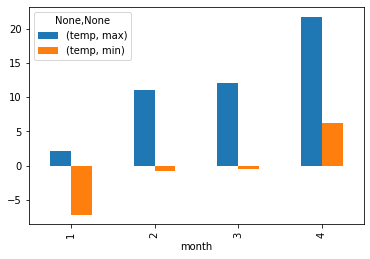

In [47]:
agg[[('temp', 'max'), ('temp', 'min')]].plot.bar()